**CRIME_DATA_ANALYSIS**

## INTRODUCTION

### OBJECTIVE: In this capstone project, we will use Python, specifically the PyMySQL library, to interact with a MySQL database in order to analyze and gain insights from crime data.

#  Database Setup and Import :
	Crime_data.CSV file imported in MySQL
####   - Create a MySQL database.
	Database created with the name crime (CREATE DATABASE CRIME)
#### - Load the provided crime dataset into the MySQL database.
	Crime dataset loaded in MySQL


#### pip -  “Preferred Installer Program” for python
#### Module - a module is a file consisting of Python code-To define functions, classes, and variables, and can also include runnable code.
#### Package - is a collection of modules eg., Pandas, Numpy
#### Libraries - is a collection of packages eg.,Matplotlib, Seaborn,etc

In [ ]:
import pymysql #an easy-to-use interface for connecting to and communicating with a MySQL database in a Python program.
import pandas as pd #is a Python library used for working with data sets.
import matplotlib.pyplot as plt #Matplotlib is a low level graph plotting library in python that serves as a visualization utility.#pyplot is a submodule
import seaborn as sns #Seaborn is a library that uses Matplotlib underneath to plot graphs.

# Database Connection :     

### --Use PyMySQL to establish a connection to the database.

In [ ]:
#Connect method-To connect MySQL database
import pymysql
connection=pymysql.connect(
    host='localhost',
    user='root',
    password='mysql1234',
    db='crime',
)
#Cursor method-Start pointing to the database,make connection to execute the query
cursor=connection.cursor()
Crime_data="SELECT * FROM crime.crime_data;"
#Execute method-To Execute the query through Python
cursor.execute(Crime_data)
#Fetchall method-To fetch the output of whole SQL query executed
output=cursor.fetchall()
#To get the output
print(output)

((10304468, '01-08-2020', '2020-08-01', 'Southwest', 624, 'BATTERY - SIMPLE ASSAULT', 36, 'F', 'SINGLE FAMILY DWELLING', 'AO', '1100 W 39TH PL', 34.01, -118.3), (190101086, '01-02-2020', '2020-01-01', 'Central', 624, 'BATTERY - SIMPLE ASSAULT', 25, 'M', 'SIDEWALK', 'IC', '700 S HILL ST', 34.05, -118.25), (191501505, '01-01-2020', '2020-01-01', 'N Hollywood', 745, 'VANDALISM - MISDEAMEANOR ($399 OR UNDER)', 76, 'F', 'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)', 'IC', '5400 CORTEEN PL', 34.17, -118.4), (191921269, '01-01-2020', '2020-01-01', 'Mission', 740, 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)', 31, 'X', 'BEAUTY SUPPLY STORE', 'IC', '14400 TITUS ST', 34.22, -118.45), (200100502, '01-02-2020', '2020-02-01', 'Central', 442, 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)', 23, 'M', 'DEPARTMENT STORE', 'IC', '700 S FIGUEROA ST', 34.05, -118.26), (200100504, '01-04-2020', '2020-04-01', 'Central', 946, 'OTHER MISCELLANEOUS CRIME', 0, 'X', 'POLICE FACILITY', 'IC', '200 E 6TH ST

### --Verify the successful import of data.

In [ ]:
#creating dataframe for analyses
df=pd.read_sql(Crime_data,connection)
df.head()

C:\Users\Elite001\AppData\Local\Temp\ipykernel_11788\3372338657.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(Crime_data,connection)


,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON
0,10304468,01-08-2020,2020-08-01,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,SINGLE FAMILY DWELLING,AO,1100 W 39TH PL,34.01,-118.30
1,190101086,01-02-2020,2020-01-01,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,700 S HILL ST,34.05,-118.25
2,191501505,01-01-2020,2020-01-01,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,5400 CORTEEN PL,34.17,-118.40
3,191921269,01-01-2020,2020-01-01,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,BEAUTY SUPPLY STORE,IC,14400 TITUS ST,34.22,-118.45
4,200100502,01-02-2020,2020-02-01,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,DEPARTMENT STORE,IC,700 S FIGUEROA ST,34.05,-118.26


# Data Exploration

### Q1.Retrieve basic statistics on the dataset, such as the total number of records and unique values in specific columns.

In [ ]:
#Display basic statistics
df.describe()

,DR_NO,Crm_Cd,Vict_Age,LAT,LON
count,4.990000e+02,499.000000,499.000000,499.000000,499.000000
mean,1.999930e+08,504.178357,32.142285,34.047335,-118.261283
std,8.742243e+06,198.381863,20.202136,0.053840,0.041560
min,1.030447e+07,210.000000,0.000000,33.710000,-118.560000
25%,2.001044e+08,330.000000,23.000000,34.040000,-118.260000
50%,2.001048e+08,442.000000,31.000000,34.050000,-118.250000
75%,2.001064e+08,624.000000,46.500000,34.050000,-118.240000
max,2.220130e+08,956.000000,78.000000,34.280000,-118.190000


In [ ]:
#Total number of records
df.shape

(499, 13)

In [ ]:
#checking the list of column names
df.columns

Index(['DR_NO', 'Date_Rptd', 'DATE_OCC', 'AREA_NAME', 'Crm_Cd', 'Crm_Cd_Desc',
       'Vict_Age', 'Vict_Sex', 'Premis_Desc', 'Status', 'Location', 'LAT',
       'LON'],
      dtype='object')

In [ ]:
#isnull-check for missing values in a DataFrame.
df.isnull().sum()

DR_NO          0
Date_Rptd      0
DATE_OCC       0
AREA_NAME      0
Crm_Cd         0
Crm_Cd_Desc    0
Vict_Age       0
Vict_Sex       0
Premis_Desc    0
Status         0
Location       0
LAT            0
LON            0
dtype: int64

In [ ]:
#unique values in specific columns
df['AREA_NAME'].unique()

array(['Southwest', 'Central', 'N Hollywood', 'Mission', 'Van Nuys',
       'Wilshire', 'Rampart', 'Harbor', 'Pacific', 'Hollenbeck',
       'West LA', 'Northeast', 'Foothill', 'Hollywood', 'West Valley',
       '77th Street', 'Olympic', 'Devonshire', 'Southeast'], dtype=object)

In [ ]:
df['Status'].unique()

array(['AO', 'IC', 'AA', 'JO'], dtype=object)

# Temporal Analysis

### Q1. Analyze the temporal aspects of the data.

In [ ]:
df.dtypes

DR_NO            int64
Date_Rptd       object
DATE_OCC        object
AREA_NAME       object
Crm_Cd           int64
Crm_Cd_Desc     object
Vict_Age         int64
Vict_Sex        object
Premis_Desc     object
Status          object
Location        object
LAT            float64
LON            float64
dtype: object

In [ ]:
df_date=df[["DATE_OCC"]].sample(frac=1).reset_index(drop=True)
df_date

,DATE_OCC
0,2020-07-11
1,2020-02-01
2,2020-05-02
3,2020-02-08
4,2020-05-01
...,...
494,2020-03-01
495,2020-01-02
496,2020-08-01
497,2020-04-01


In [ ]:
#convert object to datetime
date_time=df_date["DATE_OCC"]=pd.to_datetime(df_date["DATE_OCC"])
date_time

0     2020-07-11
1     2020-02-01
2     2020-05-02
3     2020-02-08
4     2020-05-01
         ...    
494   2020-03-01
495   2020-01-02
496   2020-08-01
497   2020-04-01
498   2020-03-02
Name: DATE_OCC, Length: 499, dtype: datetime64[ns]

In [ ]:
#importing datetime library
import datetime as dt
print(dir(dt))

['MAXYEAR', 'MINYEAR', 'UTC', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'date', 'datetime', 'datetime_CAPI', 'sys', 'time', 'timedelta', 'timezone', 'tzinfo']


In [ ]:
#year
df_date["DATE_OCC"].dt.year

0      2020
1      2020
2      2020
3      2020
4      2020
       ... 
494    2020
495    2020
496    2020
497    2020
498    2020
Name: DATE_OCC, Length: 499, dtype: int32

In [ ]:
#month
df_date["DATE_OCC"].dt.month

0      7
1      2
2      5
3      2
4      5
      ..
494    3
495    1
496    8
497    4
498    3
Name: DATE_OCC, Length: 499, dtype: int32

In [ ]:
#day
df_date["DATE_OCC"].dt.day

0      11
1       1
2       2
3       8
4       1
       ..
494     1
495     2
496     1
497     1
498     2
Name: DATE_OCC, Length: 499, dtype: int32

In [ ]:
df_date["DATE_OCC"].dt.weekday

0      5
1      5
2      5
3      5
4      4
      ..
494    6
495    3
496    5
497    2
498    0
Name: DATE_OCC, Length: 499, dtype: int32

In [ ]:
df_date["year"]=df_date["DATE_OCC"].dt.year
df_date["month"]=df_date["DATE_OCC"].dt.month
df_date["day"]=df_date["DATE_OCC"].dt.day
df_date

,DATE_OCC,year,month,day
0,2020-07-11,2020,7,11
1,2020-02-01,2020,2,1
2,2020-05-02,2020,5,2
3,2020-02-08,2020,2,8
4,2020-05-01,2020,5,1
...,...,...,...,...
494,2020-03-01,2020,3,1
495,2020-01-02,2020,1,2
496,2020-08-01,2020,8,1
497,2020-04-01,2020,4,1


In [ ]:
df_date.dtypes

DATE_OCC    datetime64[ns]
year                 int32
month                int32
day                  int32
dtype: object

### Q2. Determine trends in crime occurrence over time.

In [ ]:
#counting no.of crime in a year
df_year=df_date["year"].value_counts()
df_year

year
2020    499
Name: count, dtype: int64

In [ ]:
df_month=df_date["month"].value_counts().sort_index()
df_month

month
1     71
2     52
3     48
4     53
5     47
6     46
7     36
8     30
9     18
10    28
11    48
12    22
Name: count, dtype: int64

In [ ]:
#counting no.of crime in every month
df_month=df_date["day"].value_counts().sort_index()
df_month

day
1     314
2     130
3       4
4       5
5       5
6       6
7       3
8       3
9       5
10      4
11      8
12     12
Name: count, dtype: int64

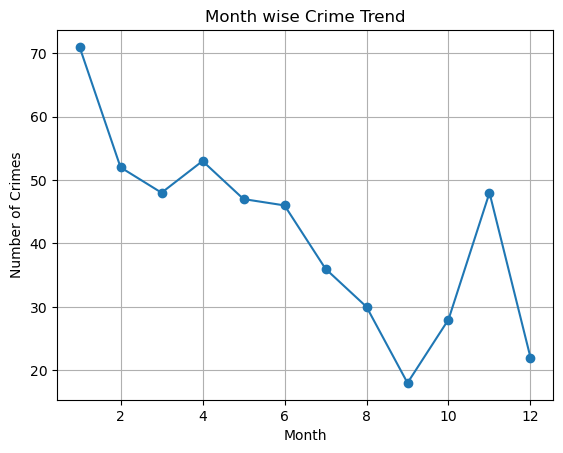

In [ ]:
#visualizing the the no.of crime - month wise using matplotlib
import matplotlib.pyplot as plt
plt.plot(df_month.index,df_month.values,marker='o',linestyle='-')
plt.title("Month wise Crime Trend")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.grid(True)
plt.show()

In [ ]:
df_day=df_date["day"].value_counts().sort_index()
df_day

day
1     314
2     130
3       4
4       5
5       5
6       6
7       3
8       3
9       5
10      4
11      8
12     12
Name: count, dtype: int64

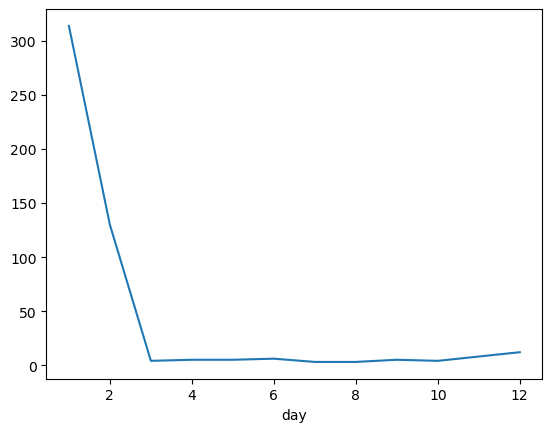

In [ ]:
#day-wise crime occured - plotted using pandas line graph
lines = df_day.plot.line(x='index', y='values')

<Axes: xlabel='month', ylabel='day'>

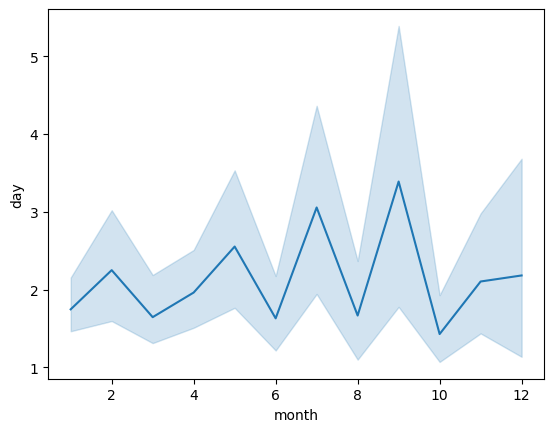

In [ ]:
import seaborn as sns
sns.lineplot(data=df_date, x="month", y="day")

# Spatial Analysis:

### Q1.Where are the geographical hotspots for reported crimes?

In [ ]:
#Connect method-To connect MySQL database
import pymysql
connection=pymysql.connect(
    host='localhost',
    user='root',
    password='mysql1234',
    db='crime',
)
#Cursor method-Start pointing to the database,make connection to execute the query
cursor=connection.cursor()
hotspot="select LON, LAT, count(*) as geo_count,AREA_NAME from crime.crime_data group by LON, LAT,AREA_NAME order by geo_count desc;"
#Execute method-To Execute the query through Python
cursor.execute(hotspot)
#Fetchall method-To fetch the output of whole SQL query executed
output=cursor.fetchall()
#To get the output
for i in output:
    print(i)

(-118.26, 34.05, 94, 'Central')
(-118.25, 34.05, 75, 'Central')
(-118.25, 34.04, 47, 'Central')
(-118.24, 34.06, 43, 'Central')
(-118.24, 34.05, 39, 'Central')
(-118.26, 34.04, 38, 'Central')
(-118.24, 34.04, 24, 'Central')
(-118.27, 34.04, 21, 'Central')
(-118.23, 34.07, 7, 'Central')
(-118.23, 34.06, 6, 'Central')
(-118.23, 34.05, 6, 'Central')
(-118.25, 34.06, 5, 'Central')
(-118.26, 34.03, 4, 'Central')
(-118.23, 34.04, 4, 'Central')
(-118.27, 34.05, 3, 'Central')
(-118.25, 34.07, 3, 'Central')
(-118.33, 34.1, 3, 'Hollywood')
(-118.29, 33.74, 3, 'Harbor')
(-118.31, 33.99, 3, '77th Street')
(-118.56, 34.21, 2, 'West Valley')
(-118.24, 34.07, 2, 'Central')
(-118.3, 34.01, 2, 'Southwest')
(-118.27, 34.03, 2, 'Central')
(-118.27, 34.06, 2, 'Rampart')
(-118.26, 34.06, 2, 'Rampart')
(-118.19, 34.11, 2, 'Northeast')
(-118.28, 34.09, 2, 'Northeast')
(-118.31, 33.81, 1, 'Harbor')
(-118.45, 34.01, 1, 'Pacific')
(-118.43, 34.2, 1, 'Van Nuys')
(-118.22, 34.08, 1, 'Hollenbeck')
(-118.38, 34.06,

In [ ]:
#creating dataframe for spatial analysis
df_spatial_analysis=pd.read_sql(hotspot,connection)
df_spatial_analysis.head()

C:\Users\Elite001\AppData\Local\Temp\ipykernel_11788\1119431670.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_spatial_analysis=pd.read_sql(hotspot,connection)


,LON,LAT,geo_count,AREA_NAME
0,-118.26,34.05,94,Central
1,-118.25,34.05,75,Central
2,-118.25,34.04,47,Central
3,-118.24,34.06,43,Central
4,-118.24,34.05,39,Central


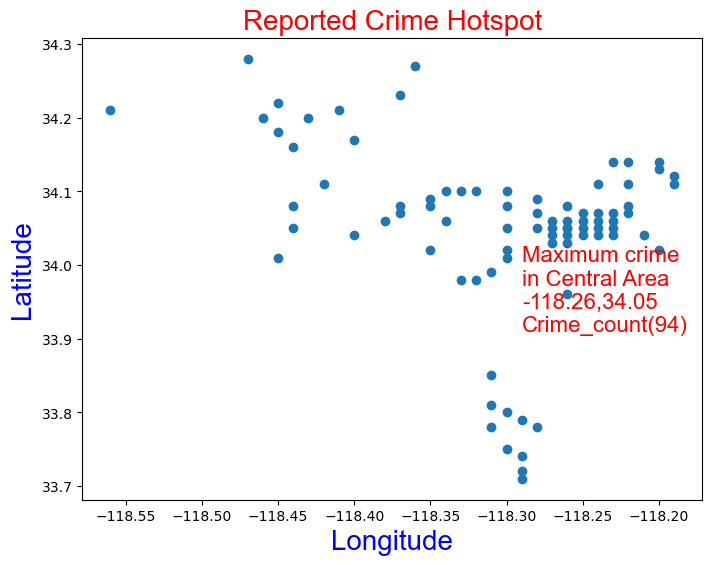

In [ ]:
#scatterplot-plotting the hotspot using matplotlib.pyplot

plt.figure(figsize=(8,6))
plt.scatter(x=df_spatial_analysis['LON'],y=df_spatial_analysis['LAT'])
plt.text(-118.29, 33.91,"Maximum crime \nin Central Area\n-118.26,34.05\nCrime_count(94)",fontdict={'family':'Arial','size':16,'color':'r'})
plt.title("Reported Crime Hotspot",fontdict={'family':'Arial','size':20,'color':'r'})
plt.xlabel("Longitude",fontdict={'family':'Arial','size':20,'color':'b'})
plt.ylabel("Latitude",fontdict={'family':'Arial','size':20,'color':'b'})
plt.show()

### Q2.Visualize crime hotspots on a map

In [ ]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#importing folium - data visualization library in Python for plotting interactive maps.
import folium

In [ ]:
#according to the dataset - locate map based on the latitude and longitude mean values
hotspot_map=folium.Map(location=[df_spatial_analysis.LAT.mean(),df_spatial_analysis.LON.mean()],zoom_start=7,)
hotspot_map

In [ ]:
#converting datastructure from tuple to NESTED list to visualize POINT on map
Point=df_spatial_analysis[['LAT','LON']].values.tolist()
Point

[[34.05, -118.26],
 [34.05, -118.25],
 [34.04, -118.25],
 [34.06, -118.24],
 [34.05, -118.24],
 [34.04, -118.26],
 [34.04, -118.24],
 [34.04, -118.27],
 [34.07, -118.23],
 [34.06, -118.23],
 [34.05, -118.23],
 [34.06, -118.25],
 [34.03, -118.26],
 [34.04, -118.23],
 [34.05, -118.27],
 [34.07, -118.25],
 [34.1, -118.33],
 [33.74, -118.29],
 [33.99, -118.31],
 [34.21, -118.56],
 [34.07, -118.24],
 [34.01, -118.3],
 [34.03, -118.27],
 [34.06, -118.27],
 [34.06, -118.26],
 [34.11, -118.19],
 [34.09, -118.28],
 [33.81, -118.31],
 [34.01, -118.45],
 [34.2, -118.43],
 [34.08, -118.22],
 [34.06, -118.38],
 [34.04, -118.21],
 [34.11, -118.42],
 [34.12, -118.19],
 [34.27, -118.36],
 [34.1, -118.34],
 [34.02, -118.3],
 [34.23, -118.37],
 [34.2, -118.46],
 [33.78, -118.28],
 [34.05, -118.28],
 [33.72, -118.29],
 [34.08, -118.26],
 [33.79, -118.29],
 [33.98, -118.32],
 [34.21, -118.41],
 [34.1, -118.32],
 [34.08, -118.3],
 [34.05, -118.3],
 [34.28, -118.47],
 [33.71, -118.29],
 [34.06, -118.34],
 [

In [ ]:
#For loop - to create point based on the LON AND LAT values in the list -folium.Marker
for point in Point:
    point_hotspot_map=folium.Marker(point, popup='Point').add_to(hotspot_map)
print(point_hotspot_map)

In [ ]:
#for adding child point to visualize - need folium.FeatureGroup
fg=folium.FeatureGroup(name='Crime_hotspot')
fg.add_child(folium.Marker(location=[34.05,-118.26],popup='Central',icon=folium.Icon(color='blue'),zoom=13))
hotspot_map.add_child(fg)

In [ ]:
#Tried for popup
hotspot_map.add_child(folium.LatLngPopup())

# Victim Demographics¶

### Q1.What is the distribution of victim ages in reported crimes?

In [ ]:
#Connect method-To connect MySQL database
import pymysql
connection=pymysql.connect(
    host='localhost',
    user='root',
    password='mysql1234',
    db='crime',
)
#Cursor method-Start pointing to the database,make connection to execute the query
cursor=connection.cursor()
vict_age="select Vict_Age,count(*) as crime_count from crime_data where vict_age is not null group by vict_age ORDER by vict_age;"
#Execute method-To Execute the query through Python
cursor.execute(vict_age)
#Fetchall method-To fetch the output of whole SQL query executed
output=cursor.fetchall()
#To get the output
print(output)


((0, 90), (8, 1), (9, 1), (12, 2), (13, 1), (17, 1), (18, 2), (19, 6), (20, 5), (21, 3), (22, 12), (23, 15), (24, 10), (25, 13), (26, 19), (27, 12), (28, 16), (29, 14), (30, 15), (31, 13), (32, 13), (33, 9), (34, 9), (35, 17), (36, 8), (37, 8), (38, 13), (39, 6), (40, 7), (41, 7), (42, 3), (43, 6), (44, 5), (45, 9), (46, 3), (47, 3), (48, 7), (49, 5), (50, 5), (51, 5), (52, 3), (53, 5), (54, 2), (55, 9), (56, 9), (57, 13), (58, 7), (59, 5), (60, 5), (61, 5), (62, 5), (63, 2), (64, 4), (65, 2), (66, 2), (67, 5), (68, 2), (69, 2), (70, 1), (71, 3), (72, 2), (73, 2), (74, 1), (75, 2), (76, 1), (78, 1))


In [ ]:
#creating dataframe for victim age distribution
df_victim_age_distribution=pd.read_sql(vict_age,connection)
df_victim_age_distribution.head()

C:\Users\Elite001\AppData\Local\Temp\ipykernel_19232\3342043512.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_victim_age_distribution=pd.read_sql(vict_age,connection)


,Vict_Age,crime_count
0,0,90
1,8,1
2,9,1
3,12,2
4,13,1


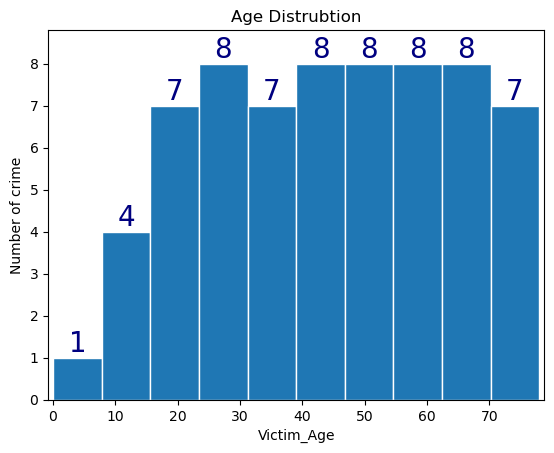

In [ ]:
#histogram - plotting the no.of crimes based on the age-group using matplotlib.pyplot

import matplotlib.pyplot as plt
values, bins, bars = plt.hist(df_victim_age_distribution['Vict_Age'], edgecolor='white')
plt.xlabel("Victim_Age")
plt.ylabel("Number of crime")
plt.title('Age Distrubtion')
plt.bar_label(bars, fontsize=20, color='navy')
plt.margins(x=0.01, y=0.1)
plt.show()

### Q2.Is there a significant difference in crime rates between male and female victims?

In [ ]:
#Connect method-To connect MySQL database
import pymysql
connection=pymysql.connect(
    host='localhost',
    user='root',
    password='mysql1234',
    db='crime',
)
#Cursor method-Start pointing to the database,make connection to execute the query
cursor=connection.cursor()
vict_sex="select vict_sex,Count(*) as crime_rate from crime_data where crime_data.vict_sex in(select vict_sex from crime_data where vict_sex!='X' and vict_sex!='  ')group by vict_sex limit 2;"
#Execute method-To Execute the query through Python
cursor.execute(vict_sex)
#Fetchall method-To fetch the output of whole SQL query executed
output=cursor.fetchall()
#To get the output
print(output)

(('F', 155), ('M', 278))


In [ ]:
#creating dataframe - To find the significant difference in male and female
df_significant_diff=pd.read_sql(vict_sex,connection)
df_significant_diff.head()

C:\Users\Elite001\AppData\Local\Temp\ipykernel_19232\529286004.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_significant_diff=pd.read_sql(vict_sex,connection)


,vict_sex,crime_rate
0,F,155
1,M,278


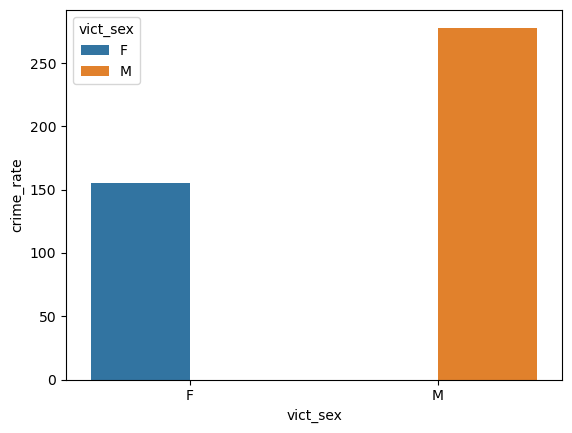

In [ ]:
#barplot - plotting the male and female crime_rate using seaborn
#seaborn
#data visualization library for statistical graphics plotting in Python.
#to make an easy way to create visually appealing plots with minimal code and offers a wide range of customization options.

import seaborn as sns
bar=sns.barplot(x=df_significant_diff.vict_sex, y=df_significant_diff.crime_rate,data=df_significant_diff,hue="vict_sex")

### chi-square test(categorical data)
#### Is there a significant difference in crime rates between male and female victims

In [ ]:
from scipy import stats

In [ ]:
#create contigency table
contigency_table=pd.crosstab(df_significant_diff['vict_sex'],df_significant_diff['crime_rate'])
contigency_table

crime_rate,155,278
vict_sex,,
F,1,0
M,0,1


In [ ]:
#perform chi-square test
chi2,p,dof,expected=stats.chi2_contingency(contigency_table)
stats.chi2_contingency(contigency_table)

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[0.5, 0.5],
       [0.5, 0.5]]))

In [ ]:
#print the result
print('Chi_square statistic:',chi2)
print('p-value:',p)
print('Degree of Frequency:',dof)
print(f'Expected:\n{expected}')

Chi_square statistic: 0.0
p-value: 1.0
Degree of Frequency: 1
Expected:
[[0.5 0.5]
 [0.5 0.5]]


In [ ]:
#interpret the result
p_value=float(input())
if p_value <0.05:
    print ("There is a significant difference in crime_rate between male and female")
else:
    print ("There is no significant difference in crime_rate between male and female")

1.0
There is no significant difference in crime_rate between male and female


###  q3. Identify common premises descriptions where crimes occur.

In [ ]:
#Connect method-To connect MySQL database
import pymysql
connection=pymysql.connect(
    host='localhost',
    user='root',
    password='mysql1234',
    db='crime',
)
#Cursor method-Start pointing to the database,make connection to execute the query
cursor=connection.cursor()
Premis_Desc="select Premis_Desc,Count(*) as premis_count from crime_data group by Premis_Desc order by premis_count desc limit 5;"
#Execute method-To Execute the query through Python
cursor.execute(Premis_Desc)
#Fetchall method-To fetch the output of whole SQL query executed
output=cursor.fetchall()
#To get the output
for i in output:
    print(i)

('STREET', 105)
('SIDEWALK', 62)
('PARKING LOT', 46)
('MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)', 45)
('SINGLE FAMILY DWELLING', 25)


In [ ]:
#creating dataframe for analysing the premises descriptions
premises_descriptions=pd.read_sql(Premis_Desc,connection)
premises_descriptions.head()

C:\Users\Elite001\AppData\Local\Temp\ipykernel_19232\3254262420.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  premises_descriptions=pd.read_sql(Premis_Desc,connection)


,Premis_Desc,premis_count
0,STREET,105
1,SIDEWALK,62
2,PARKING LOT,46
3,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",45
4,SINGLE FAMILY DWELLING,25


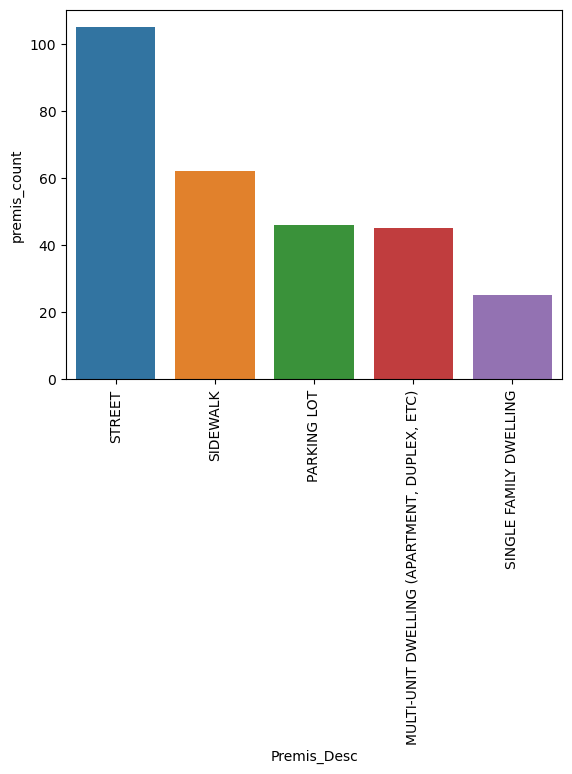

In [ ]:
#barplot using matplotlib and seaborn

import matplotlib.pyplot as plt
import seaborn as sns
bar=sns.barplot(x=premises_descriptions.Premis_Desc,y=premises_descriptions.premis_count, data=premises_descriptions)
plt.xticks(rotation=90)
plt.show()


# Location Analysis:

### Q1.Where do most crimes occur based on the "Location" column?

In [ ]:
#Connect method-To connect MySQL database
import pymysql
connection=pymysql.connect(
    host='localhost',
    user='root',
    password='mysql1234',
    db='crime',
)
#Cursor method-Start pointing to the database,make connection to execute the query
cursor=connection.cursor()
Most_Crime="select Location,count(*) as Loc_crime_count from crime_data group by location order by Loc_crime_count desc limit 5;"
#Execute method-To Execute the query through Python
cursor.execute(Most_Crime)
#Fetchall method-To fetch the output of whole SQL query executed
output=cursor.fetchall()
#To get the output
print(output)


(('800 N ALAMEDA ST', 14), ('700 W 7TH ST', 11), ('300 E 5TH ST', 6), ('1100 S FIGUEROA ST', 6), ('6TH', 6))


In [ ]:
#creating dataframe for analysing the location column
Location_analysis=pd.read_sql(Most_Crime,connection)
Location_analysis.head()

C:\Users\Elite001\AppData\Local\Temp\ipykernel_19232\1103477979.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Location_analysis=pd.read_sql(Most_Crime,connection)


,Location,Loc_crime_count
0,800 N ALAMEDA ST,14
1,700 W 7TH ST,11
2,300 E 5TH ST,6
3,1100 S FIGUEROA ST,6
4,6TH,6


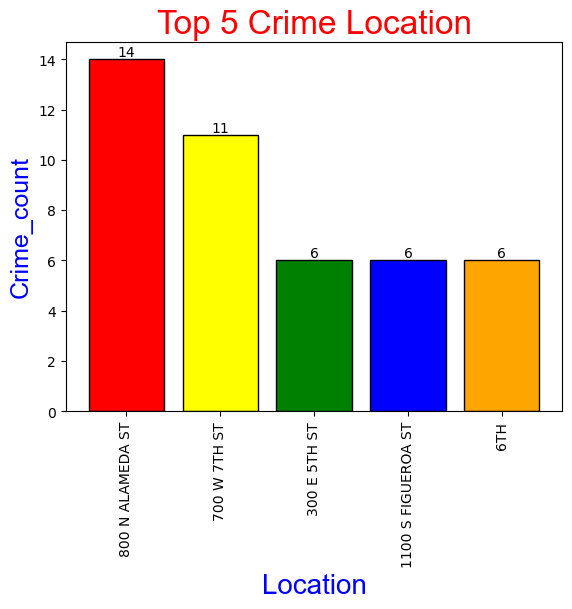

In [ ]:
#barplot-plotting the most crime occuring location using matplotlib.pyplot

import matplotlib.pyplot as plt

Location=Location_analysis['Location'].values
count=Location_analysis['Loc_crime_count'].values
barplot=plt.bar(x=Location,height=count,color=['red', 'yellow', 'green', 'blue', 'orange'],edgecolor='black')
plt.bar_label(barplot,labels=count)
plt.title("Top 5 Crime Location",fontdict={'family':'Arial','size':24,'color':'r'})
plt.xlabel("Location",fontdict={'family':'Arial','size':20,'color':'b'})
plt.ylabel("Crime_count",fontdict={'family':'Arial','size':18,'color':'b'})
plt.xticks(rotation=90)
plt.show()

# Crime Code Analysis

### Q1. What is the distribution of reported crimes based on Crime Code?

In [ ]:
#Connect method-To connect MySQL database
import pymysql
connection=pymysql.connect(
    host='localhost',
    user='root',
    password='mysql1234',
    db='crime',
)
#Cursor method-Start pointing to the database,make connection to execute the query
cursor=connection.cursor()
Crime_code="select Crm_Cd, Crm_Cd_Desc, count(*) as code_count from crime_data group by Crm_Cd,Crm_Cd_Desc order by code_count desc;"
#Execute method-To Execute the query through Python
cursor.execute(Crime_code)
#Fetchall method-To fetch the output of whole SQL query executed
output=cursor.fetchall()
#To get the output
for i in output:
    print(i)


(330, 'BURGLARY FROM VEHICLE', 82)
(624, 'BATTERY - SIMPLE ASSAULT', 74)
(440, 'THEFT PLAIN - PETTY ($950 & UNDER)', 44)
(442, 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)', 28)
(510, 'VEHICLE - STOLEN', 28)
(341, 'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD', 26)
(230, 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT', 24)
(745, 'VANDALISM - MISDEAMEANOR ($399 OR UNDER)', 23)
(740, 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)', 23)
(888, 'TRESPASSING', 19)
(310, 'BURGLARY', 16)
(210, 'ROBBERY', 12)
(480, 'BIKE - STOLEN', 11)
(354, 'THEFT OF IDENTITY', 10)
(350, 'THEFT, PERSON', 9)
(420, 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)', 9)
(930, 'CRIMINAL THREATS - NO WEAPON DISPLAYED', 7)
(761, 'BRANDISH WEAPON', 5)
(623, 'BATTERY POLICE (SIMPLE)', 5)
(662, 'BUNCO, GRAND THEFT', 5)
(946, 'OTHER MISCELLANEOUS CRIME', 4)
(220, 'ATTEMPTED ROBBERY', 4)
(648, 'ARSON', 3)
(901, 'VIOLATION OF RESTRAINING ORDER', 3)
(900, 'VIOLATION OF COURT ORDER', 2)
(886, 'DISTURBING 

In [ ]:
#indexing and silicing
cursor=connection.cursor()
Crime="select Crm_Cd, Crm_Cd_Desc, count(*) as Reported_crime from crime_data where vict_sex is not null group by Crm_Cd,Crm_Cd_Desc order by Reported_crime desc limit 10;"
cursor.execute(Crime)
output=cursor.fetchall()
for i in output:
    print(i[0]," ",i[2])


330   82
624   74
440   44
442   28
510   28
341   26
230   24
745   23
740   23
888   19


In [ ]:
#creating dataframe - to analyze crime based on the crime code
df_cca=pd.read_sql(Crime,connection)
df_cca.head(10)

C:\Users\Elite001\AppData\Local\Temp\ipykernel_19232\4230205982.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cca=pd.read_sql(Crime,connection)


,Crm_Cd,Crm_Cd_Desc,Reported_crime
0,330,BURGLARY FROM VEHICLE,82
1,624,BATTERY - SIMPLE ASSAULT,74
2,440,THEFT PLAIN - PETTY ($950 & UNDER),44
3,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),28
4,510,VEHICLE - STOLEN,28
5,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",26
6,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",24
7,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),23
8,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",23
9,888,TRESPASSING,19


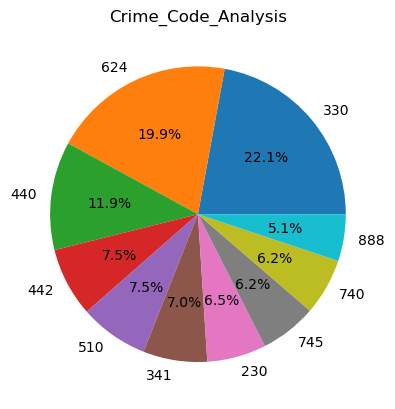

In [ ]:
#pie chart - plotting the percentage of crime occurance based on the crime code using matplotlib.pyplot

plt.pie(df_cca['Reported_crime'],labels=df_cca['Crm_Cd'],autopct='%1.1f%%',startangle=0)
plt.title("Crime_Code_Analysis")
plt.show()

# Status Analysis

### Q1. Examine the status of reported crimes.

In [ ]:
df_status=df["Status"].value_counts()
df_status

Status
IC    447
AA     27
AO     24
JO      1
Name: count, dtype: int64

<Axes: xlabel='Status'>

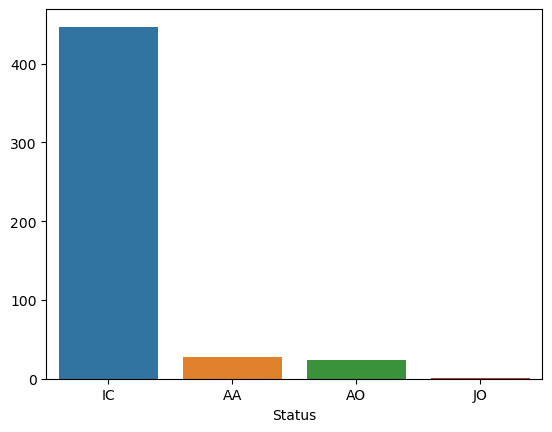

In [ ]:
import seaborn as sns
sns.barplot(x=df_status.index,y=df_status.values)

### Q2. Classify crimes based on their current status.

In [ ]:
status=input("Enter the current status: ")
if status=='IC':
    print('Inspector Incharge: 44 Crimes under the incharge of Inspector')
elif status=='AA':
    print('APPEAL ACQUITAL: 27 Crimes under appeal')
elif status=='AO':
    print('Adolescent Offender: 24 crimes made by Adolescent are arrested')
else:
    print('Juvenile Offender: 1 crime made by juvenile are arrested' )

Enter the current status: AO
Adolescent Offender: 24 crimes made by Adolescent are arrested


# CONCLUSION

### After analysing this crime data we came to know that most crimes are buglary from vehicle(330) and batter-simple assault(624), mostly affected victims are by the male(278) compared to female(155) between the age group of 15-78years. Most crimes occur in the street and side walk especially in the 800N Alameda st, Central. Crime occurance is more in the 1st 2days of every month and its more in the month of january and february. Finally, the most of the crime-reported status are in the IC-Inspector Inchare.

# !!!!!THANK YOU!!!!!